In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')


In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
len(ratings)

100836

In [6]:
ratings['movieId'].nunique()

9724

In [7]:
ratings['userId'].nunique()

610

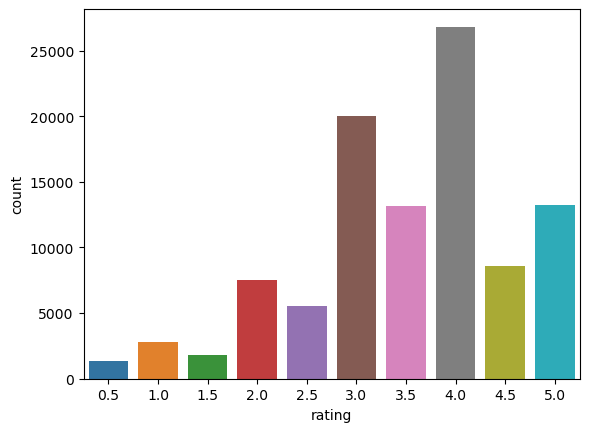

In [8]:
sns.countplot(x = 'rating', data = ratings)
plt.show()

In [9]:
ratings['rating'].mean()

3.501556983616962

In [10]:
movie_ratings = ratings.merge(movies, on = 'movieId')

In [11]:
movie_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [12]:
movie_ratings['title'].value_counts()[0:10]

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64

In [13]:
mean_rating = movie_ratings.groupby('movieId')[['rating']].mean()
mean_rating 

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [14]:
lowest_rating = mean_rating['rating'].idxmin()
movie_ratings[movie_ratings['movieId'] == lowest_rating]

,userId,movieId,rating,timestamp,title,genres
13633,89,3604,0.5,1520408880,Gypsy (1962),Musical


In [15]:
highest_rating = mean_rating['rating'].idxmax()
movie_ratings[movie_ratings['movieId'] == highest_rating]

,userId,movieId,rating,timestamp,title,genres
13368,85,53,5.0,889468268,Lamerica (1994),Adventure|Drama
96115,603,53,5.0,963180003,Lamerica (1994),Adventure|Drama


In [16]:
mstats = ratings.groupby('movieId')['rating'].agg(['count','mean'])
mstats.head()

,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429


In [17]:
c = mstats['count'].mean()
m = mstats['mean'].mean()


In [18]:
def bayesian_avg(ratings):
    bayesian_avg = (c*m+ratings.sum())/(c+ratings.count())
    return bayesian_avg

In [19]:
lamerica = pd.Series([5,5])
bayesian_avg(lamerica)

3.5433826131392228

In [22]:
bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
mstats = mstats.merge(bayesian_avg_ratings, on='movieId')

In [23]:
mstats = mstats.merge(movies[['movieId', 'title']])
mstats.sort_values('bayesian_avg', ascending=False).head()

,movieId,count,mean,bayesian_avg,title
277,318,317,4.429022,4.392070,"Shawshank Redemption, The (1994)"
659,858,192,4.289062,4.236457,"Godfather, The (1972)"
2224,2959,218,4.272936,4.227052,Fight Club (1999)
224,260,251,4.231076,4.192646,Star Wars: Episode IV - A New Hope (1977)
46,50,204,4.237745,4.190567,"Usual Suspects, The (1995)"


In [24]:
movies['genres'] = movies['genres'].apply(lambda x: x.split("|"))
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [25]:
from collections import Counter

genre_frequency = Counter(individual_genre for genres in movies['genres'] for individual_genre in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 20 genres.


Counter({'Adventure': 1263,
         'Animation': 611,
         'Children': 664,
         'Comedy': 3756,
         'Fantasy': 779,
         'Romance': 1596,
         'Drama': 4361,
         'Action': 1828,
         'Crime': 1199,
         'Thriller': 1894,
         'Horror': 978,
         'Mystery': 573,
         'Sci-Fi': 980,
         'War': 382,
         'Musical': 334,
         'Documentary': 440,
         'IMAX': 158,
         'Western': 167,
         'Film-Noir': 87,
         '(no genres listed)': 34})

In [26]:
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']

In [28]:
genre_frequency_df

,genre,count
0,Adventure,1263
1,Animation,611
2,Children,664
3,Comedy,3756
4,Fantasy,779
5,Romance,1596
6,Drama,4361
7,Action,1828
8,Crime,1199
9,Thriller,1894


In [32]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df['userId'].nunique()
    N = df['movieId'].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
    
    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

csr_mat, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(ratings)

In [33]:
csr_mat.shape

(610, 9724)

In [34]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
sparsity

0.016999683055613623

In [38]:
from thefuzz import process
def movie_finders(title):
    all_titles = movies['title'].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0]

In [30]:
from sklearn.neighbors import NearestNeighbors


In [47]:
def find_similar_movies(title, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):

    X = X.T
    neighbour_ids = []
    movie_id = movies[movies['title'] == title].iloc[0, 0]
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1, -1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k + 1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0, k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [48]:
movie_real_title = movie_finders('Harry Potter')


In [52]:
recommend_name = find_similar_movies(movie_real_title, csr_mat, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
recommend_name


[5816, 40815, 8368, 69844, 4306, 54001, 81834, 4886, 6539]

In [54]:
movie_titles = dict(zip(movies['movieId'], movies['title']))
for i in recommend_name:
    print(movie_titles[i])

Harry Potter and the Chamber of Secrets (2002)
Harry Potter and the Goblet of Fire (2005)
Harry Potter and the Prisoner of Azkaban (2004)
Harry Potter and the Half-Blood Prince (2009)
Shrek (2001)
Harry Potter and the Order of the Phoenix (2007)
Harry Potter and the Deathly Hallows: Part 1 (2010)
Monsters, Inc. (2001)
Pirates of the Caribbean: The Curse of the Black Pearl (2003)


In [55]:
import pickle

In [56]:
movies.to_pickle("./movie_df.pkl")

In [57]:
pickle.dump(movie_mapper,open('movie_mapper.pkl','wb'))
pickle.dump(movie_inv_mapper,open('movie_inv_mapper.pkl','wb'))
pickle.dump(csr_mat,open('csr_mat.pkl','wb'))